In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('tips.csv')


In [3]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


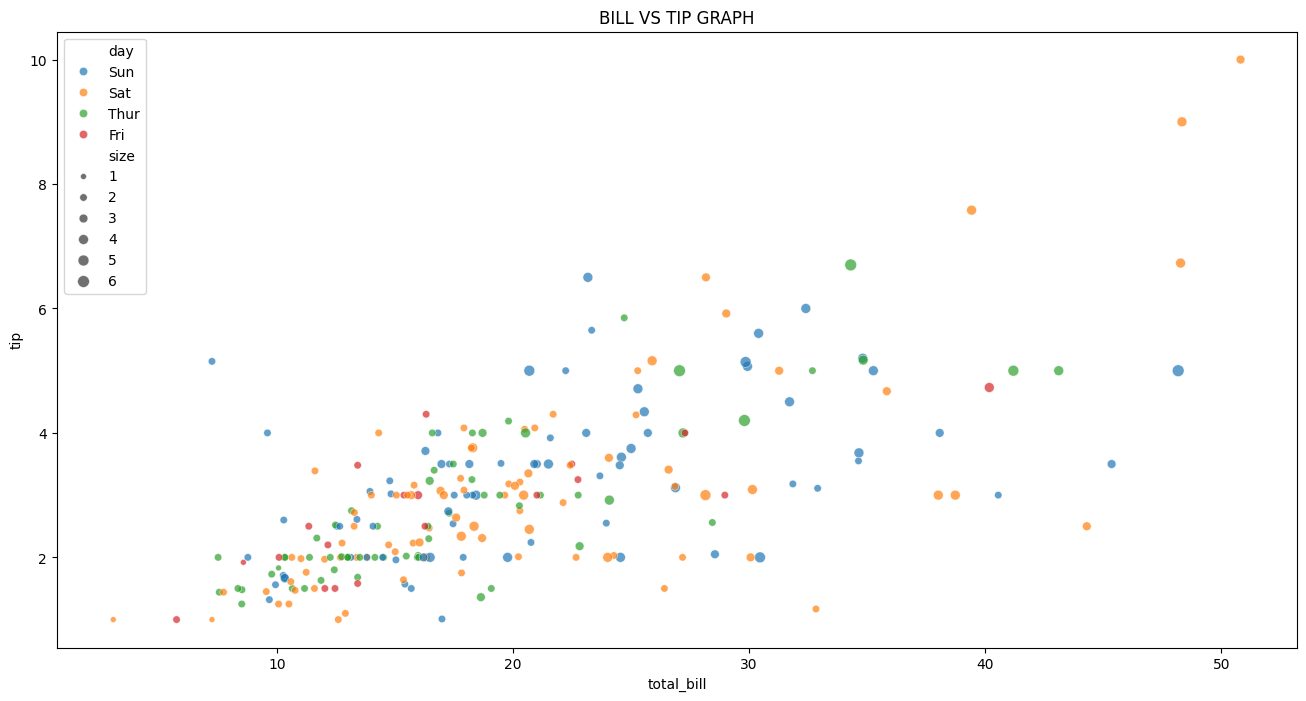

In [4]:


plt.figure(figsize = (16,8))
sns.scatterplot(data = data,x = data['total_bill'],y = data['tip'], hue = 'day', size = 'size', alpha = 0.7, legend = 'full')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('BILL VS TIP GRAPH')
plt.show()

In [5]:
tip_by_day = data['day'].value_counts()

In [6]:
tip_by_day

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

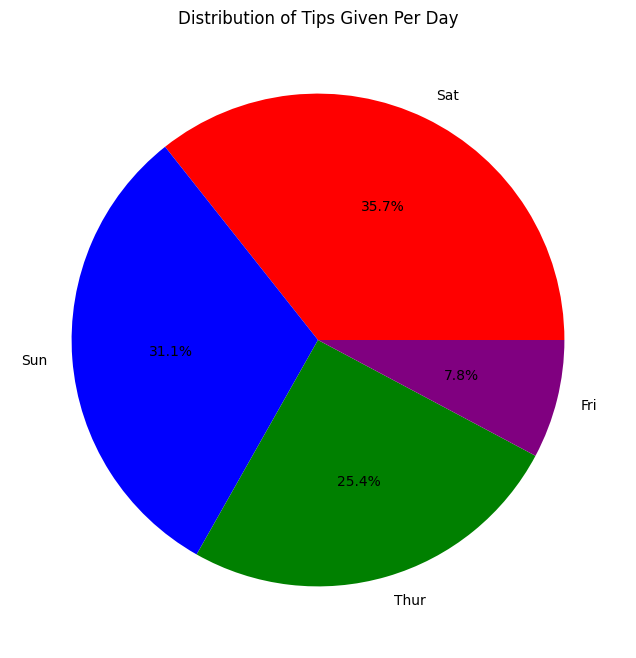

In [7]:
tips_by_day = data['day'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    tips_by_day, 
    labels=tips_by_day.index,  # Days as labels
    autopct='%1.1f%%',  # Show percentage of tips for each day
    
    # Rotate for better readability
    colors=["red", "blue", "green", "purple"],  # Custom colors
      # Slightly separate slices for better visibility
)

plt.title("Distribution of Tips Given Per Day")
plt.show()

In [8]:
gender = data['sex'].value_counts()

In [9]:
gender

sex
Male      157
Female     87
Name: count, dtype: int64

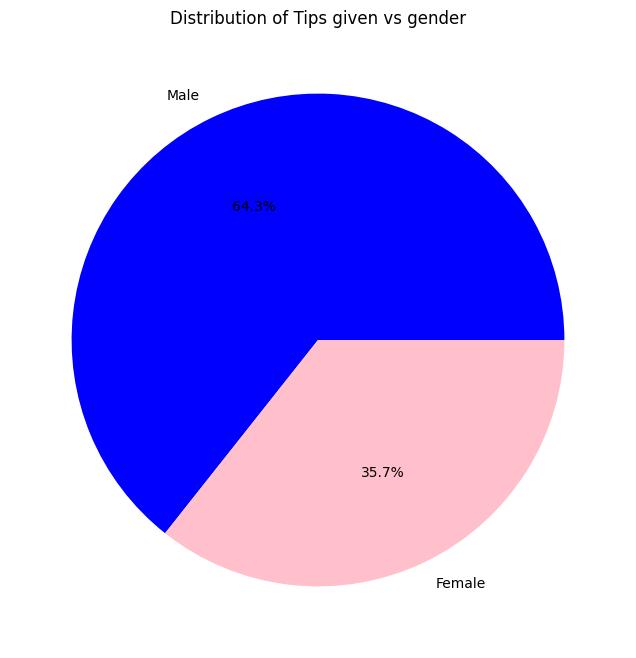

In [10]:
gender = data['sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender, 
    labels=gender.index,  # Days as labels
    autopct='%1.1f%%',  # Show percentage of tips for each day
    
    # Rotate for better readability
    colors=["blue", "pink"],  # Custom colors
      # Slightly separate slices for better visibility
)

plt.title("Distribution of Tips given vs gender")
plt.show()

In [11]:
smoker = data['smoker'].value_counts()

In [12]:
smoker

smoker
No     151
Yes     93
Name: count, dtype: int64

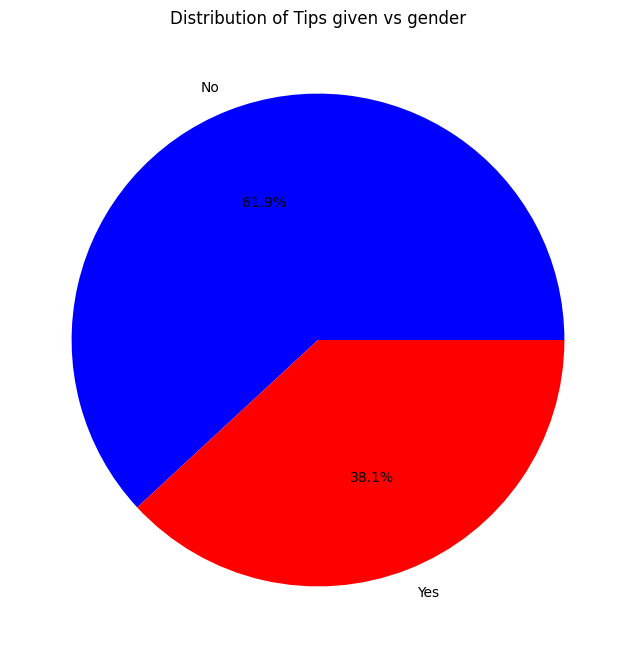

In [13]:
smoker = data['smoker'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    smoker, 
    labels=smoker.index,  # Days as labels
    autopct='%1.1f%%',  # Show percentage of tips for each day
    
    # Rotate for better readability
    colors=["blue", "red"],  # Custom colors
      # Slightly separate slices for better visibility
)

plt.title("Distribution of Tips given vs gender")
plt.show()

In [14]:
time = data['time'].value_counts()

In [15]:
time

time
Dinner    176
Lunch      68
Name: count, dtype: int64

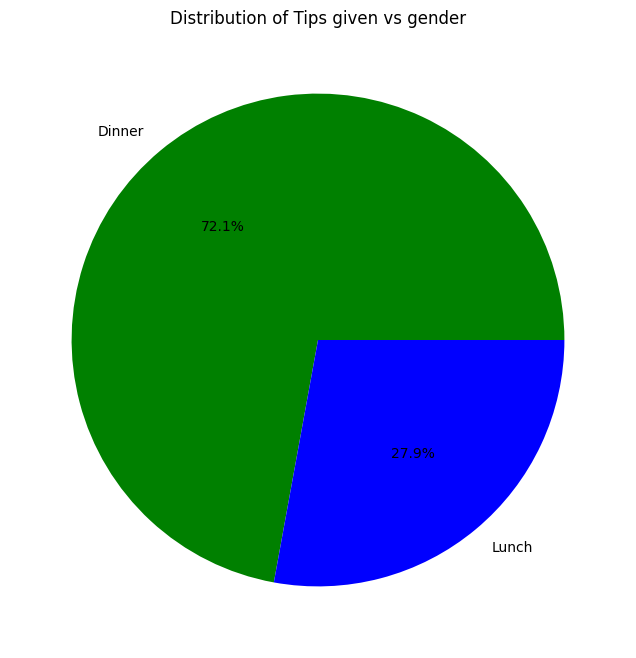

In [16]:
time = data['time'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    time, 
    labels=time.index,  # Days as labels
    autopct='%1.1f%%',  # Show percentage of tips for each day
    
    # Rotate for better readability
    colors=["green", "blue"],  # Custom colors
      # Slightly separate slices for better visibility
)

plt.title("Distribution of Tips given vs gender")
plt.show()

In [17]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})

In [18]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


In [19]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [20]:
X = data.drop(columns = 'tip')
y = data['tip']

In [21]:
X.shape, y.shape

((244, 6), (244,))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((195, 6), (195,), (49, 6), (49,))

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score 
Predictions = model.predict(X_test)

mean_squared_error(y_test, Predictions)




0.6963090766605349

In [26]:
root_mean_squared_error(y_test, Predictions)

0.83445136266923

In [27]:
mean_absolute_error(y_test, Predictions)

0.6685728160722872

In [28]:
r2_score(y_test, Predictions)

0.4429399687489898

In [29]:
Predictions[:5]


array([2.95915033, 1.9793852 , 3.93355525, 3.81512843, 2.17478172])

In [30]:
y_test[:5]

24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
Name: tip, dtype: float64

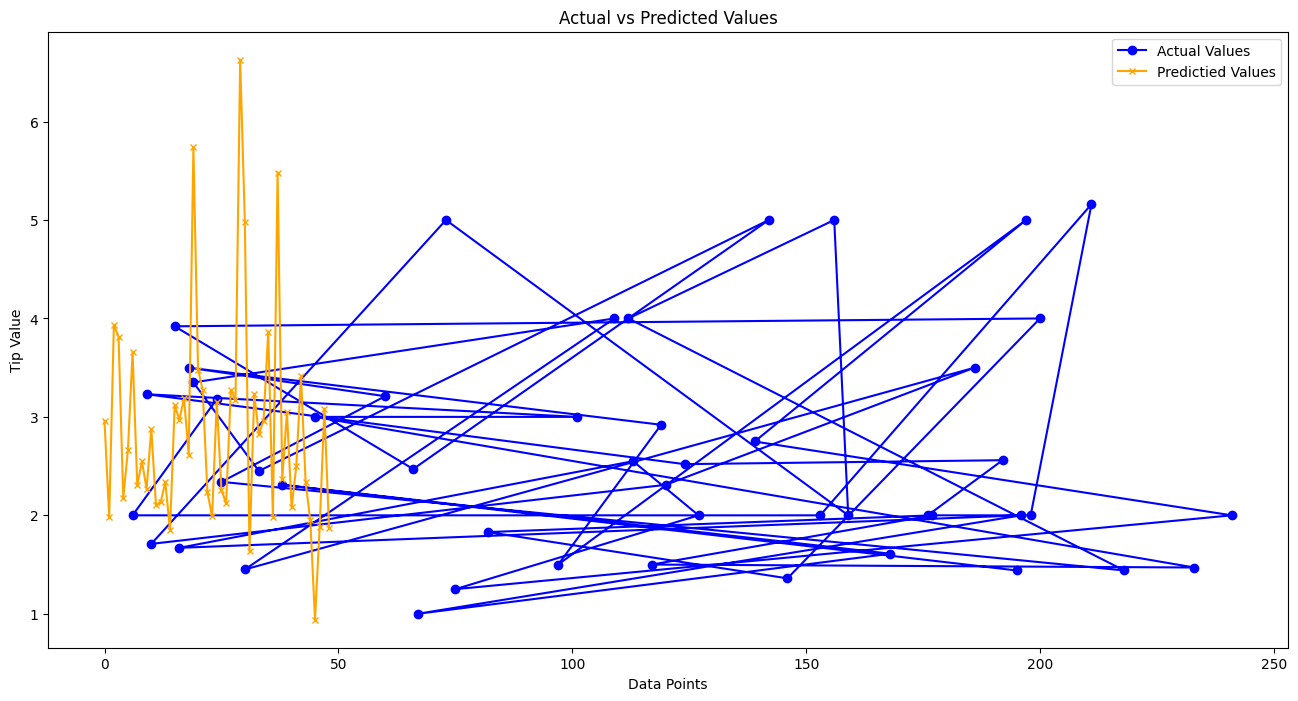

In [31]:
plt.figure(figsize = (16,8))
plt.plot(y_test, label = "Actual Values", color = 'blue', marker = 'o',linestyle = '-', markersize = 6)
plt.plot(Predictions, label = "Predictied Values", color = 'orange', marker = 'x',linestyle = '-', markersize = 5)

plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Tip Value')
plt.legend()
plt.show()


In [32]:
features = np.array([[10000, 1, 0, 2, 1, 3]])
model.predict(features)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([945.72427621])